### Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems.



In [1]:
#!pip install pandas_datareader
#!pip install --upgrade tensorflow
#!pip install --upgrade pip
#!pip install tensorboard
#!pip install tensorboard-plugin-wit
#!pip install keras
#!pip install tensorflow

In [2]:
import pandas_datareader as pdr

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
key= 'Create Your key in Tiingo'

In [5]:
df= pdr.get_data_tiingo('AAPL',api_key=key)

In [6]:
df.head()

close    high     low    open    volume  \
symbol date                                                                  
AAPL   2015-11-27 00:00:00+00:00  117.81  118.41  117.60  118.29  13046445   
       2015-11-30 00:00:00+00:00  118.30  119.41  117.75  117.99  39180322   
       2015-12-01 00:00:00+00:00  117.34  118.81  116.86  118.75  34852374   
       2015-12-02 00:00:00+00:00  116.28  118.11  116.08  117.05  33386563   
       2015-12-03 00:00:00+00:00  115.20  116.79  114.22  116.55  41569509   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2015-11-27 00:00:00+00:00  27.283451  27.422404  27.234817  27.394613   
       2015-11-30 00:00:00+00:00  27.396929  27.653993  27.269555  27.325137   
       2015-12-01 00:00:00+00:00  27.174604  27.515039  27.063442  27.501144   
       2015-12-02 00:00:00+00:00  26.929120  27.352927  26.882803  27.107443   
       2015-12-03 00:00:00+00:00  26.679005  27.047230  26.452048  26.991649   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2015-11-27 00:00:00+00:00   52185780      0.0          1.0  
       2015-11-30 00:00:00+00:00  156721288      0.0          1.0  
       2015-12-01 00:00:00+00:00  139409496      0.0          1.0  
       2015-12-02 00:00:00+00:00  133546252      0.0          1.0  
       2015-12-03 00:00:00+00:00  166278036      0.0          1.0

In [7]:
df.to_csv('AAPL.csv')

In [8]:
df = pd.read_csv("AAPL.csv")

In [9]:
df.head()

symbol                       date   close    high     low    open    volume  \
0   AAPL  2015-11-27 00:00:00+00:00  117.81  118.41  117.60  118.29  13046445   
1   AAPL  2015-11-30 00:00:00+00:00  118.30  119.41  117.75  117.99  39180322   
2   AAPL  2015-12-01 00:00:00+00:00  117.34  118.81  116.86  118.75  34852374   
3   AAPL  2015-12-02 00:00:00+00:00  116.28  118.11  116.08  117.05  33386563   
4   AAPL  2015-12-03 00:00:00+00:00  115.20  116.79  114.22  116.55  41569509   

    adjClose    adjHigh     adjLow    adjOpen  adjVolume  divCash  splitFactor  
0  27.283451  27.422404  27.234817  27.394613   52185780      0.0          1.0  
1  27.396929  27.653993  27.269555  27.325137  156721288      0.0          1.0  
2  27.174604  27.515039  27.063442  27.501144  139409496      0.0          1.0  
3  26.929120  27.352927  26.882803  27.107443  133546252      0.0          1.0  
4  26.679005  27.047230  26.452048  26.991649  166278036      0.0          1.0

In [10]:
df.tail()

symbol                       date   close      high     low    open  \
1253   AAPL  2020-11-18 00:00:00+00:00  118.03  119.8200  118.00  118.61   
1254   AAPL  2020-11-19 00:00:00+00:00  118.64  119.0600  116.81  117.59   
1255   AAPL  2020-11-20 00:00:00+00:00  117.34  118.7700  117.29  118.64   
1256   AAPL  2020-11-23 00:00:00+00:00  113.85  117.6202  113.75  117.18   
1257   AAPL  2020-11-24 00:00:00+00:00  115.17  115.8500  112.59  113.91   

         volume  adjClose   adjHigh  adjLow  adjOpen  adjVolume  divCash  \
1253   76322111    118.03  119.8200  118.00   118.61   76322111      0.0   
1254   74112972    118.64  119.0600  116.81   117.59   74112972      0.0   
1255   73604287    117.34  118.7700  117.29   118.64   73604287      0.0   
1256  127959318    113.85  117.6202  113.75   117.18  127959318      0.0   
1257  113226248    115.17  115.8500  112.59   113.91  113226248      0.0   

      splitFactor  
1253          1.0  
1254          1.0  
1255          1.0  
1256          1.0  
1257          1.0

In [11]:
df.shape

(1258, 14)

In [12]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
symbol         1258 non-null object
date           1258 non-null object
close          1258 non-null float64
high           1258 non-null float64
low            1258 non-null float64
open           1258 non-null float64
volume         1258 non-null int64
adjClose       1258 non-null float64
adjHigh        1258 non-null float64
adjLow         1258 non-null float64
adjOpen        1258 non-null float64
adjVolume      1258 non-null int64
divCash        1258 non-null float64
splitFactor    1258 non-null float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [13]:
#Reseting the Index an creating a new column with CLOSE variable
df1 = df.reset_index()['close'] 

In [14]:
df1.shape

(1258,)

In [15]:
df1.head()

0    117.81
1    118.30
2    117.34
3    116.28
4    115.20
Name: close, dtype: float64

### Ploting the close Data

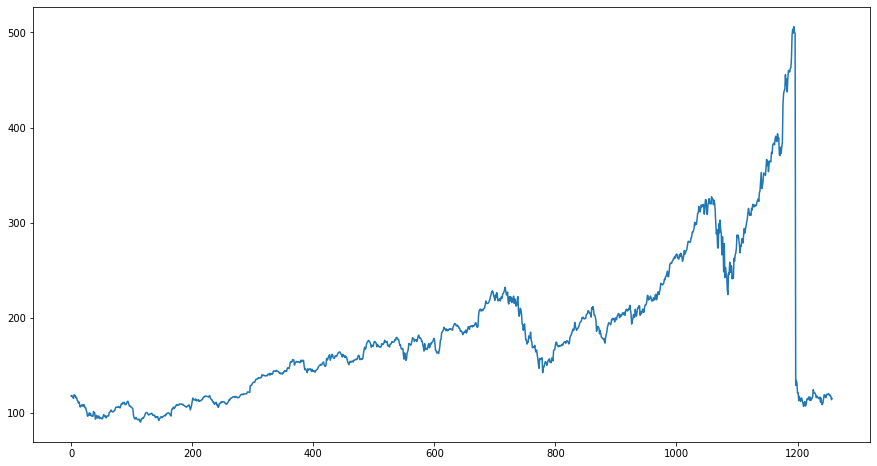

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(df1)
plt.show()

## Scaling the Data

In [17]:
##LSTM are sensitive to the scale of the data, so we apply MinMax scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
df1.shape

(1258, 1)

In [20]:
df1

array([[0.06607336],
       [0.06725195],
       [0.06494287],
       ...,
       [0.06494287],
       [0.05654841],
       [0.05972339]])

# Training and Testing the data

In [21]:
training_size = int(len(df1)*0.65) #65% data are used for training data
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [22]:
training_size,test_size # Shape of train and test data

(817, 441)

In [23]:
# Creating Function to train the model
def create_dataset(dataset, time_step = 1):
    dataX,dataY= [], [] 
    for i in range(len(dataset)-time_step-1): 
        a= dataset[i:(i+time_step),0]# i =0,1,2,3,4...100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX),np.array(dataY)

In [24]:
time_step = 100
X_train,y_train =create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [25]:
print(X_train.shape)

(716, 100)


In [26]:
# reshape input to be 3D which is Req is LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [27]:
X_train.shape,X_test.shape

((716, 100, 1), (340, 100, 1))

## Model Preparation

In [28]:
# Libraries rq for LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [29]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0090 - val_loss: 0.0592
Epoch 2/100
12/12 [==============================] - 1s 44ms/step - loss: 0.0024 - val_loss: 0.0214
Epoch 3/100
12/12 [==============================] - 0s 34ms/step - loss: 8.0531e-04 - val_loss: 0.0237
Epoch 4/100
12/12 [==============================] - 0s 32ms/step - loss: 5.9207e-04 - val_loss: 0.0208
Epoch 5/100
12/12 [==============================] - 0s 32ms/step - loss: 4.2584e-04 - val_loss: 0.0194
Epoch 6/100
12/12 [==============================] - 0s 33ms/step - loss: 3.5064e-04 - val_loss: 0.0189
Epoch 7/100
12/12 [==============================] - 0s 32ms/step - loss: 3.3576e-04 - val_loss: 0.0185
Epoch 8/100
12/12 [==============================] - 0s 32ms/step - loss: 3.2950e-04 - val_loss: 0.0180
Epoch 9/100
12/12 [==============================] - 0s 31ms/step - loss: 3.1149e-04 - val_loss: 0.0175
Epoch 10/100
12/12 [==============================] - 0s 32ms/step - lo

Epoch 79/100
12/12 [==============================] - 0s 35ms/step - loss: 1.1193e-04 - val_loss: 0.0081
Epoch 80/100
12/12 [==============================] - 0s 35ms/step - loss: 1.3018e-04 - val_loss: 0.0073
Epoch 81/100
12/12 [==============================] - 0s 38ms/step - loss: 1.2174e-04 - val_loss: 0.0077
Epoch 82/100
12/12 [==============================] - 0s 36ms/step - loss: 1.2792e-04 - val_loss: 0.0076
Epoch 83/100
12/12 [==============================] - 0s 37ms/step - loss: 1.1039e-04 - val_loss: 0.0075
Epoch 84/100
12/12 [==============================] - 0s 36ms/step - loss: 1.0519e-04 - val_loss: 0.0074
Epoch 85/100
12/12 [==============================] - 0s 42ms/step - loss: 9.8935e-05 - val_loss: 0.0074
Epoch 86/100
12/12 [==============================] - 0s 36ms/step - loss: 9.4546e-05 - val_loss: 0.0073
Epoch 87/100
12/12 [==============================] - 0s 36ms/step - loss: 9.9272e-05 - val_loss: 0.0071
Epoch 88/100
12/12 [==============================] - 1

In [32]:
import tensorflow as tf

In [33]:
#Lets do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

### Test Vs Prediction Plotting

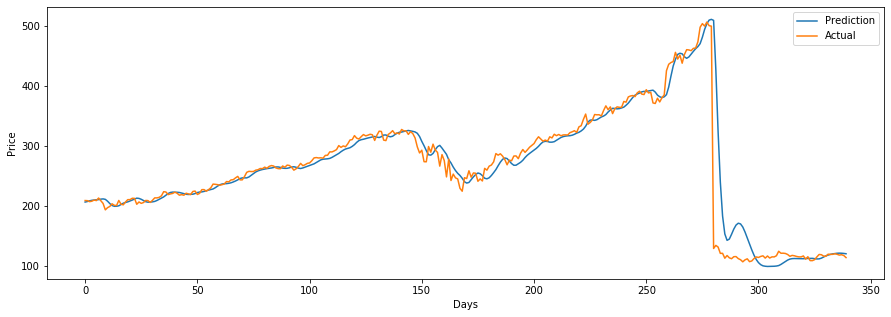

In [54]:
plt.figure(figsize=(15,5))
plt.plot(test_predict,label="Prediction")
plt.plot(scaler.inverse_transform([y_test]).reshape(-1,1),label="Actual")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

In [36]:
#transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [37]:
## calculate RMSE performance metrics for training data
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,train_predict))

158.6708944782977

In [38]:
## calculate RMSE performance metrics for testing data
np.sqrt(mean_squared_error(y_test,test_predict))

279.16621991469515

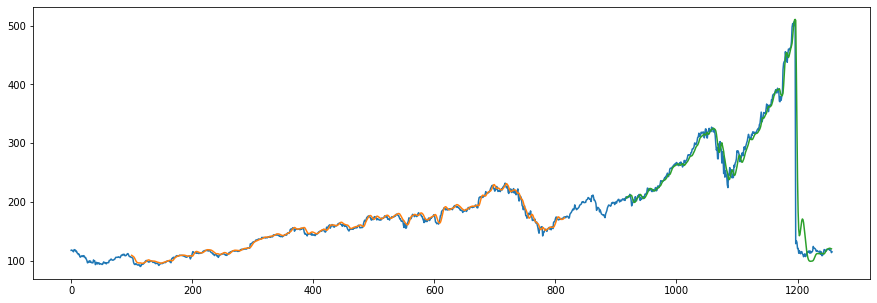

In [39]:
#Shift train predictions for plotting
plt.figure(figsize=(15,5))
look_back = 100
trainpredictplot = np.empty_like(df1)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:] = train_predict

#shift test predictions for plotting
testpredicplot = np.empty_like(df1)
testpredicplot[:,:] = np.nan
testpredicplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredicplot)
plt.show()

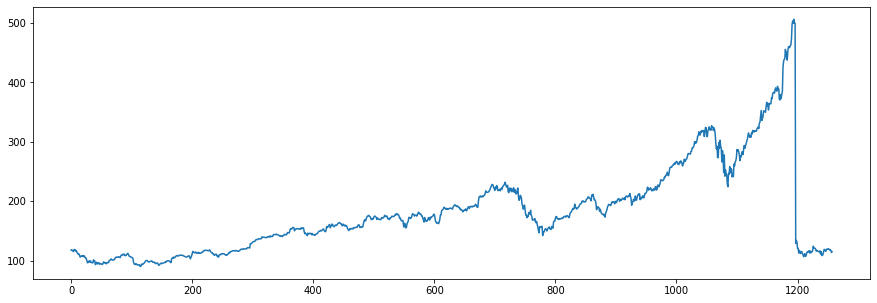

In [40]:
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(df1))

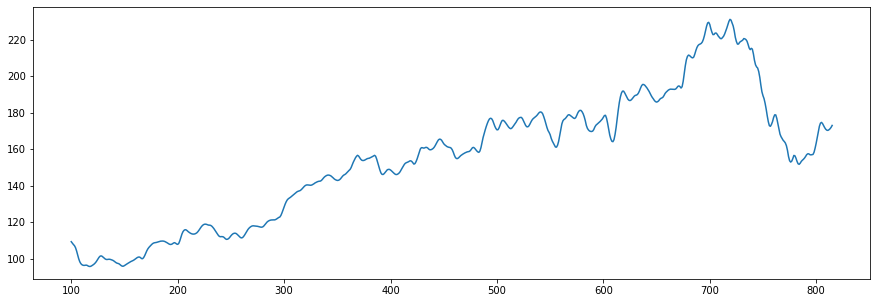

In [41]:
plt.figure(figsize=(15,5))
plt.plot(trainpredictplot)

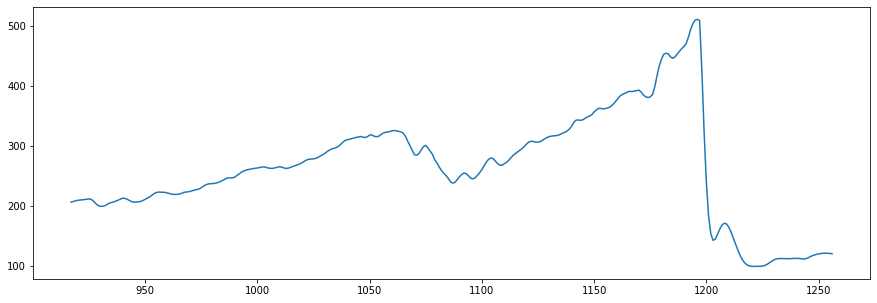

In [42]:
plt.figure(figsize=(15,5))
plt.plot(testpredicplot)

## Predicting for next 30 Days

In [43]:

#test_data for previous 100 days, we will use this data for predicting next 30 days

temp_input = test_data[340:].reshape(1,-1) # taking last 100 values from test_data
temp_input= temp_input[0].tolist() ## taking 1D value from temp_input array and converting into list


predictions=[]                                
for i in range(1,31):                                                      
    if i == 1:                                                            #here we are taking i=1 because we would be predicting based on predefined 100 data points and from else part we would be predicting based on LIFO data points
        temp_input_arr= np.array(temp_input)                              #converting the list of 100 previous data into an array
        temp_input_arr= temp_input_arr.reshape(1, len(temp_input),1)      #reshaping array to 3d as per the requirement of tensorflow model
        y_hat1= model.predict(temp_input_arr)                             #predicting the value when i=1 using tensorflow model
        temp_input.extend(y_hat1[0].tolist())                             #extending and converting to list the y_hat predicted value to temp_input list
        predictions.extend(y_hat1[0].tolist())                            #storing the y_hat value to a 30 days prediction list
        #print("day {} input {}". format(i,temp_input))
        #print('prediction for day', i, y_hat1)
        #print('======================================================')
       
    else:
        temp_input= temp_input[1:]                                       #transforming the temp_input list such that is has last 100 data points for the prediction of next day, means we are indexing is such a way that it removes the first element and adding the new prediction value
        temp_input_arr= np.array(temp_input)                             # again converting the list of 100 data into an array
        temp_input_arr= temp_input_arr.reshape(1, len(temp_input),1)     #reshaping array to 3d as per the requirement of tensorflow model
        y_hat1= model.predict(temp_input_arr)                            #predicting the value using tensorflow model
        temp_input.extend(y_hat1[0].tolist())                            #extending and converting to list the y_hat predicted value to temp_input list
        predictions.extend(y_hat1[0].tolist())                           #storing the y_hat value to a 30 days prediction list
        #print("day {} input {}". format(i,temp_input))
        #print('prediction for day', i, y_hat1)
        #print('======================================================')


print('Predictions for next 30 days: ', '\n', predictions)


Predictions for next 30 days:  
 [0.06704778969287872, 0.0655154287815094, 0.06512867659330368, 0.06557576358318329, 0.06652028113603592, 0.06772208213806152, 0.06904017180204391, 0.07040030509233475, 0.07176358997821808, 0.07310692220926285, 0.07441356033086777, 0.07567016035318375, 0.07686661928892136, 0.07799626141786575, 0.07905643433332443, 0.08004789799451828, 0.08097467571496964, 0.08184326440095901, 0.08266175538301468, 0.08343931287527084, 0.08418533205986023, 0.08490928262472153, 0.0856199562549591, 0.08632524311542511, 0.08703189343214035, 0.08774559199810028, 0.08847064524888992, 0.08921022713184357, 0.08996620774269104, 0.09073959290981293]


In [44]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


0 day input [0.6791341  0.70001203 0.7039567  0.70556825 0.70131088 0.71651233
 0.72293446 0.711365   0.70948888 0.72901984 0.71595911 0.71858088
 0.67598316 0.67377029 0.69488876 0.67990379 0.69710162 0.70816597
 0.80505111 0.83081179 0.83781118 0.8416356  0.87858088 0.85173782
 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015 0.8853638
 0.89455201 0.89594708 0.92064943 0.97929044 0.99360192 0.98366807
 1.         0.98544799 0.9834997  0.09308479 0.10544799 0.09876127
 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825  0.05209862
 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731 0.04748046
 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828 0.05712568
 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876 0.05950692
 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325 0.07304871
 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846 0.0594107
 0.05943476 0.06316296 0.05017438 0.06008419 0.044546   0.04432952
 0.04834636 0.05919423 0.06900782 0.06819002 0.06248

7 day output [[0.07040129]]
8 day input [0.70948888 0.72901984 0.71595911 0.71858088 0.67598316 0.67377029
 0.69488876 0.67990379 0.69710162 0.70816597 0.80505111 0.83081179
 0.83781118 0.8416356  0.87858088 0.85173782 0.86727601 0.83502105
 0.86999399 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708
 0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077
 0.06956103 0.07206254

16 day output [[0.08097353]]
17 day input [0.70816597 0.80505111 0.83081179 0.83781118 0.8416356  0.87858088
 0.85173782 0.86727601 0.83502105 0.86999399 0.88923632 0.88825015
 0.8853638  0.89455201 0.89594708 0.92064943 0.97929044 0.99360192
 0.98366807 1.         0.98544799 0.9834997  0.09308479 0.10544799
 0.09876127 0.07345761 0.07365003 0.05407096 0.06489477 0.0556825
 0.05209862 0.06016837 0.06061335 0.0524113  0.04810583 0.03968731
 0.04748046 0.05164161 0.04036079 0.04300661 0.0527721  0.05921828
 0.05712568 0.06126278 0.06361996 0.05455201 0.06292243 0.05488876
 0.05950692 0.05924233 0.06405292 0.08192423 0.07398677 0.07420325
 0.07304871 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846
 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419 0.044546
 0.04432952 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948
 0.06164762 0.07011425 0.06944077 0.06956103 0.07206254 0.06987372
 0.06660253 0.06806975 0.06494287 0.05654841 0.05972339 0.06704894
 0.06551648 0.06512974 

25 day output [[0.08774158]]
26 day input [0.86999399 0.88923632 0.88825015 0.8853638  0.89455201 0.89594708
 0.92064943 0.97929044 0.99360192 0.98366807 1.         0.98544799
 0.9834997  0.09308479 0.10544799 0.09876127 0.07345761 0.07365003
 0.05407096 0.06489477 0.0556825  0.05209862 0.06016837 0.06061335
 0.0524113  0.04810583 0.03968731 0.04748046 0.05164161 0.04036079
 0.04300661 0.0527721  0.05921828 0.05712568 0.06126278 0.06361996
 0.05455201 0.06292243 0.05488876 0.05950692 0.05924233 0.06405292
 0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077
 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287
 0.05654841 0.05972339 0.06704894 0.06551648 0.06512974 0.06557687
 0.06652142 0.0677232  0.06904126 0.07040129 0.07176443 0.07310759
 0.07441399 0.075670

In [47]:
day_new = np.arange(1,102)
day_pred= np.arange(101,131)
prediction_100days = scaler.inverse_transform(df1[1157:])
predictions_30days = scaler.inverse_transform(np.array(predictions).reshape(-1,1))

In [48]:
predictions_30days

array([[118.21511856],
       [117.57803952],
       [117.41724729],
       [117.60312371],
       [117.99580688],
       [118.49545565],
       [119.04345143],
       [119.60892684],
       [120.17571253],
       [120.73420291],
       [121.27743771],
       [121.79986917],
       [122.29729697],
       [122.76694568],
       [123.20771257],
       [123.61991359],
       [124.00522143],
       [124.36633717],
       [124.7066248 ],
       [125.02989433],
       [125.3400518 ],
       [125.64103425],
       [125.93649681],
       [126.22971983],
       [126.52350969],
       [126.82022987],
       [127.12167076],
       [127.42915193],
       [127.74345087],
       [128.06498575]])

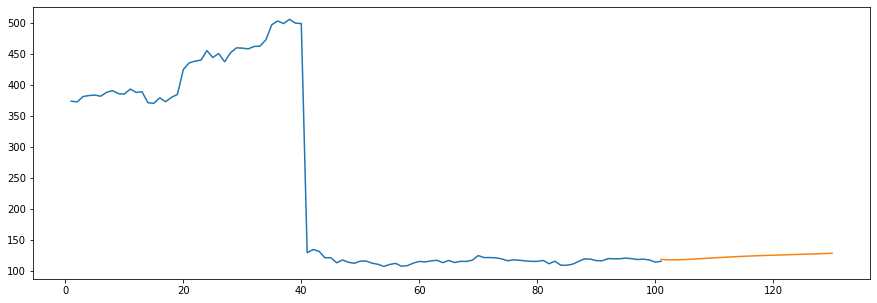

In [49]:
plt.figure(figsize=(15,5))
plt.plot(day_new.reshape(-1,1),prediction_100days)
plt.plot(day_pred,predictions_30days)
plt.show()

In [50]:
dt = prediction_100days.reshape(-1,).tolist()
dt.extend(predictions_30days.reshape(-1,).tolist())

In [51]:
df3= pd.DataFrame()
df3['Predictions'] = dt
df3.index = df3.index + 1
df3.index.set_names('Days',inplace=True)

In [52]:
df3

Predictions
Days             
1      373.850000
2      372.690000
3      381.370000
4      383.010000
5      383.680000
...           ...
127    126.820230
128    127.121671
129    127.429152
130    127.743451
131    128.064986

[131 rows x 1 columns]

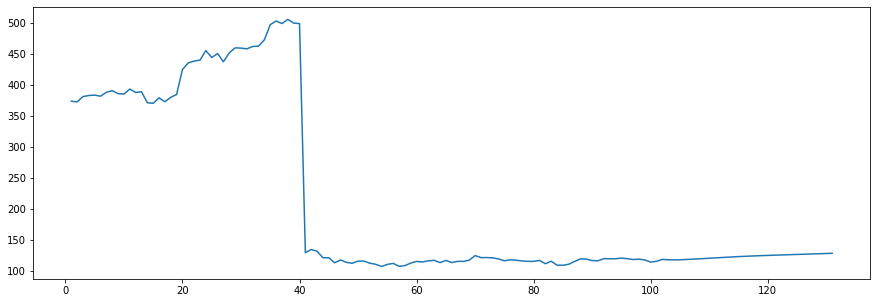

In [53]:
plt.figure(figsize=(15,5))
plt.plot(df3)